## Perkenalan

Nama : Kevin Giovanni Pradana
Batch : 007

The dataset i'm gonna use can be downloaded below :

https://www.kaggle.com/aungpyaeap/supermarket-sales


The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data

Attribute Information :

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


pandas : for importing data and create dataframe
numpy : for data manipulation and math calculation
seaborn : used for visualization
matplotlib : used for visualization 
scipy.stats : used for hypothesis testing and calculation

## Data Loading

In [2]:
#put variable for loading data
df_sales = pd.read_csv('supermarket_sales.csv')

In [3]:
#show first 5 rows of data
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#show last 5 rows of data
df_sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
#show information about dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#show columns available inside dataset
df_sales.columns.values

array(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'], dtype=object)

In [8]:
#checking dimension and amount of rows and columns
df_sales.shape

(1000, 17)

In [9]:
#show brief stats from dataset
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Data Cleaning

In [10]:
#finding missing value in dataset
miss_value = df_sales.isnull().sum().sort_values(ascending=False)

#check the miss value
miss_value

Invoice ID                 0
Total                      0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Tax 5%                     0
Branch                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Rating                     0
dtype: int64

In [11]:
#copy the dataset 
df = df_sales.copy()

we can see the dataset has no missing values, therefore it's ready to use for data analysis

### Datatype Changes

In [12]:
#change datatype for date column with datetime
df['Date'] = pd.to_datetime(df['Date'])

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [13]:
#check the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [14]:
#rename columns

dict = {'Invoice ID' : 'Invoice_ID',
        'Customer type' : 'Customer_type',
        'Product line' : 'Product_line',
        'Unit price' : 'Unit_price',
        'Tax 5%' : 'Tax_5%',
        'gross margin percentage' : 'gross_margin_percentage',
        'gross income' : 'gross_income' }

df.rename(columns=dict, inplace=True)


df

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


several columns are irrelevant for analysis, in order to simplify the dataset, we drop these columns

* Invoice ID : does not possess any information for analysis
* City : Because each branch perfectly correlated to each city, or there is one branch in each city to be exact
* Cogs : Product of unit price multiplied by quantity columns
* Time : each time assigned to each invoices


In [15]:
#drop some columns
to_drop = ['Invoice_ID', 'City', 'cogs', 'Time']

df.drop(to_drop, axis=1, inplace=True)

df.head()

,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Payment,gross_margin_percentage,gross_income,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,4.761905,26.1415,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,4.761905,3.8200,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,4.761905,16.2155,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,4.761905,23.2880,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,4.761905,30.2085,5.3


In [16]:
#make date as index in dataset
df = df.set_index('Date')

In [17]:
#save data into your local computer
df.to_csv(r'./final_data.csv')

## Data Exploration

we might be interested in general overview of the sales at each branch. The total amount of sales and average per invoice can be calculated with groupby function

In [18]:
#import data using link 
data_url = pd.read_csv('https://raw.githubusercontent.com/KevinGiovanniP/Supermarket_Analysis/main/final_data.csv')
#assign dataset into a new variable
df_final = data_url

In [19]:
#show mean sum and total transaction in dataset group by branch
df[['Branch', 'Total']].groupby('Branch').agg(['mean', 'sum','count'])

Total                   
              mean          sum count
Branch                               
A       312.354031  106200.3705   340
B       319.872506  106197.6720   332
C       337.099715  110568.7065   328

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    340
B    332
C    328
Name: Branch, dtype: int64

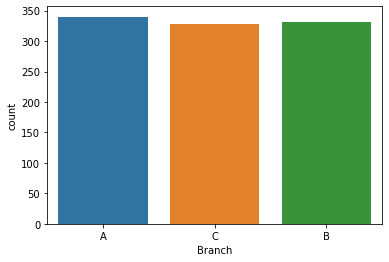

In [20]:
# show figure to find out which branch has the most transaction
sns.countplot(df_final['Branch'])
df_final['Branch'].value_counts()

<AxesSubplot:xlabel='Branch'>

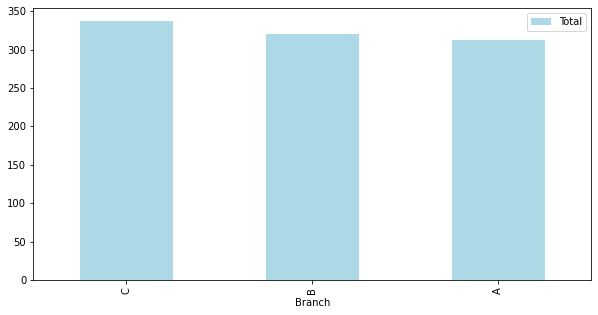

In [21]:
#checking which branch has the highest total sales 
df[['Branch', 'Total']].groupby('Branch').mean().sort_values(by='Branch', ascending=False).plot(kind='bar',color='lightblue', figsize=(10,5))

<AxesSubplot:xlabel='Product_line'>

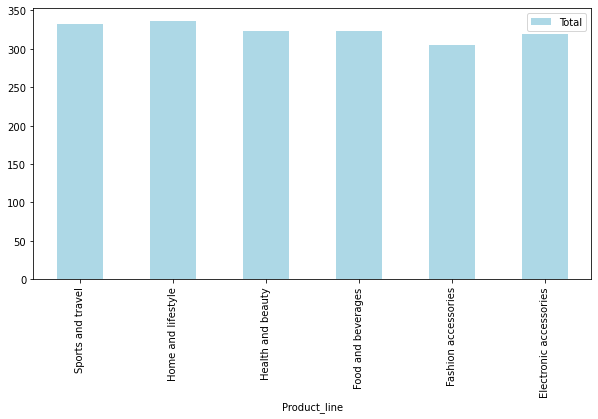

In [22]:
# checking which product line has the highest total average
df[['Product_line', 'Total']].groupby('Product_line').mean().sort_values(by='Product_line', ascending=False).plot(kind='bar',color='lightblue', figsize=(10,5))

C branch has the highest average sales amount per invoice,, the sales amount on branch C is highet than the other branches eventhough the number of invoices in lower

In [23]:
#checking which product line has the highest average mean and difference between each of them
df[['Product_line', 'Unit_price']].groupby('Product_line').mean().sort_values(by='Unit_price', ascending=False)

,Unit_price
Product_line,
Fashion accessories,57.153652
Sports and travel,56.993253
Food and beverages,56.008851
Home and lifestyle,55.316937
Health and beauty,54.854474
Electronic accessories,53.551588


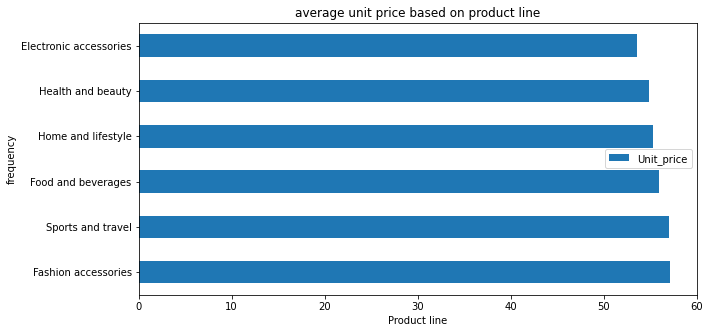

In [24]:
df[['Product_line', 'Unit_price']].groupby('Product_line').mean().sort_values(by='Unit_price', ascending=False).plot(kind='barh', figsize=(10,5))

plt.ylabel('frequency')
plt.xlabel('Product line')
plt.legend()
plt.title("average unit price based on product line")
plt.show()


According to the average unit price, fashion accessories lead the list, but the average unit price is close to each other

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total  transaction by Gender'}, xlabel='Product_line', ylabel='count'>

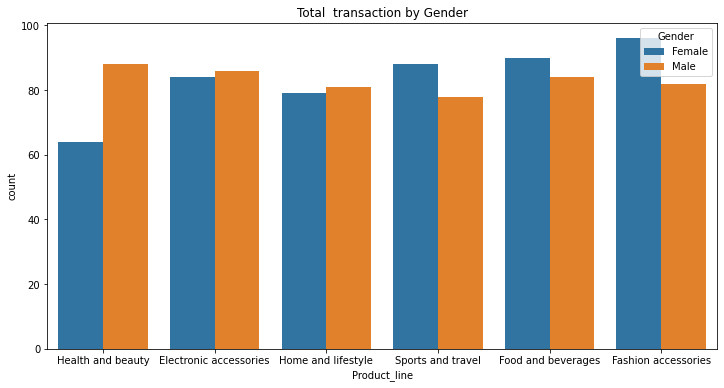

In [45]:
plt.figure(figsize=(12, 6))
plt.title('Total  transaction by Gender')
sns.countplot(df_final['Product_line'], hue = df_final.Gender)

### Boxplot

which branch is the most profitable between branch A, B and C

In [26]:
df_final.head()

,Date,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Payment,gross_margin_percentage,gross_income,Rating
0,2019-01-05,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,4.761905,26.1415,9.1
1,2019-03-08,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,4.761905,3.8200,9.6
2,2019-03-03,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,4.761905,16.2155,7.4
3,2019-01-27,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,4.761905,23.2880,8.4
4,2019-02-08,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,4.761905,30.2085,5.3


C:\Users\DATA\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


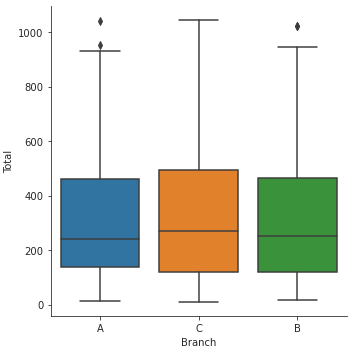

In [46]:
#checking branch total median and whether it's way different or not
with sns.axes_style(style='ticks'):
    b = sns.factorplot("Branch", "Total", data=df_final, kind="box")
    b.set_axis_labels("Branch", "Total");

between those 3 branches, there is not much difference in gross income by branches at average level. Branch C has slightly higher income than A or B. though A has more in sales than others 

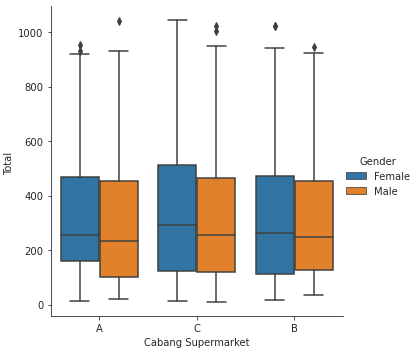

In [50]:
#checking geneder compate to total based on branch
with sns.axes_style(style='ticks'):
            g = sns.catplot(x='Branch', y="Total", hue='Gender', data=df_final, kind="box")
            g.set_axis_labels(" Supermarket Branch", "Total ");
                    

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


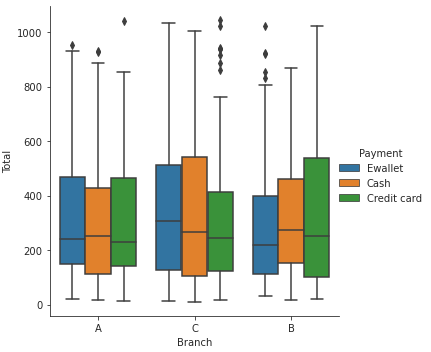

In [28]:
with sns.axes_style(style='ticks'):
    b = sns.factorplot("Branch", "Total", "Payment", data=df_final, kind="box")
    b.set_axis_labels("Branch", "Total");

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


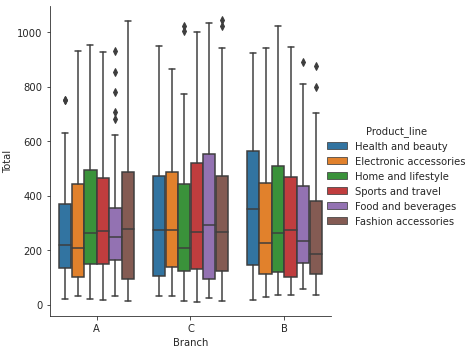

In [51]:
with sns.axes_style(style='ticks'):
    b = sns.factorplot("Branch", "Total", "Product_line", data=df_final, kind="box")
    b.set_axis_labels("Branch", "Total");

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


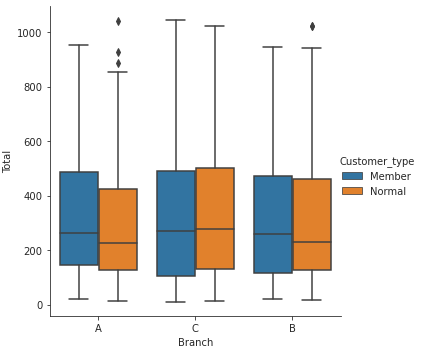

In [52]:
with sns.axes_style(style='ticks'):
    b = sns.factorplot("Branch", "Total", "Customer_type", data=df_final, kind="box")
    b.set_axis_labels("Branch", "Total");

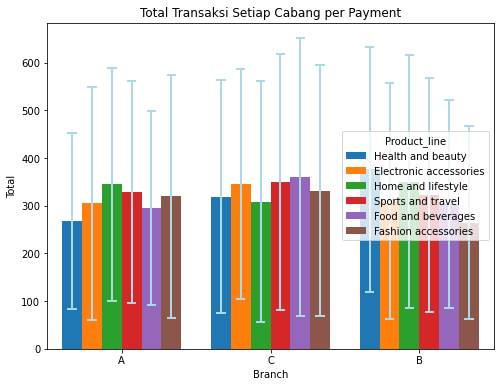

In [47]:
sns.axes_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Total', hue='Product_line',
             data=df_final, ci='sd',
             capsize=0.05,
             saturation=5,
             errcolor='lightblue',
             errwidth=2)
plt.xlabel("Branch")
plt.ylabel("Total")
plt.title("Total Transaksi Setiap Cabang per Payment")
plt.show()

### Distplot

checking how many items most customers buy

C:\Users\DATA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x29000710d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

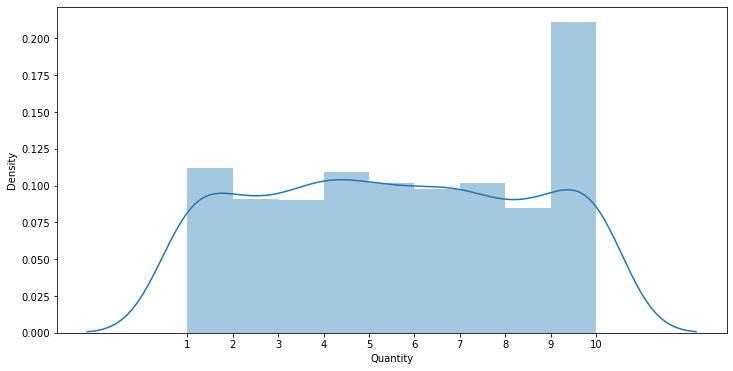

In [30]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df_final['Quantity'])
plt.xticks(xdata)

most customers buy 10 quantities in each individual transaction

### Heatmap

<AxesSubplot:>

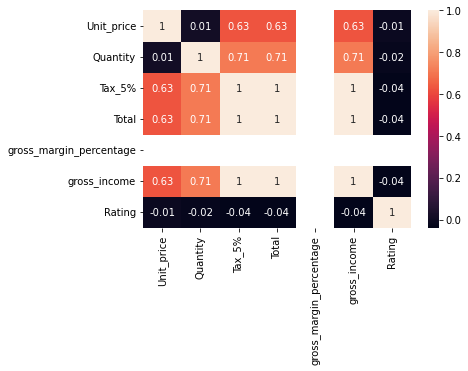

In [31]:
sns.heatmap(np.round(df_final.corr(),2), annot=True)

as you can see on heatmap above, unit_price is correlated 63% to gross income. 

## Hypothesis Testing

Based on data exploration above, i will use Total to make hypothesis depend on each branch. Total known as sales daily based on date

These are my hypothesis based on average sales (Total) from each branch:

***H0: μ_A = μ_B = μ_C***

***H1: μ_A != μ_B != μ_C***



In [32]:
df_final.groupby('Date').sum()

,Unit_price,Quantity,Tax_5%,Total,gross_margin_percentage,gross_income,Rating
Date,,,,,,,
2019-01-01,659.95,81,225.9610,4745.1810,57.142857,225.9610,79.0
2019-01-02,357.08,48,92.6430,1945.5030,38.095238,92.6430,48.4
2019-01-03,475.66,37,98.9585,2078.1285,38.095238,98.9585,64.9
2019-01-04,310.46,32,77.3185,1623.6885,28.571429,77.3185,39.1
2019-01-05,739.64,55,168.4135,3536.6835,57.142857,168.4135,89.2
...,...,...,...,...,...,...,...
2019-03-26,558.64,52,93.4530,1962.5130,61.904762,93.4530,86.1
2019-03-27,568.41,45,138.2295,2902.8195,47.619048,138.2295,67.6
2019-03-28,455.25,48,106.1620,2229.4020,47.619048,106.1620,70.5


In [42]:
data_A = df_final[df_final['Branch']=='A'].groupby('Date').sum()['Quantity']
data_B = df_final[df_final['Branch']=='B'].groupby('Date').sum()['Quantity']
data_C = df_final[df_final['Branch']=='C'].groupby('Date').sum()['Quantity']


In [40]:
data_A

Date
2019-01-01    37
2019-01-02     7
2019-01-03    19
2019-01-04    15
2019-01-05    27
              ..
2019-03-26    25
2019-03-27    22
2019-03-28    35
2019-03-29    13
2019-03-30    23
Name: Quantity, Length: 89, dtype: int64

In [34]:
#data_A_total = data_A['Total']
#data_B_total = data_B['Total']
#data_C_total = data_C['Total']

print("Daily Average of A: ",data_A.mean())
print("Daily Average of B: ",data_B.mean())
print("Daily Average of C: ",data_C.mean())



Daily Average of A:  20.8876404494382
Daily Average of B:  21.162790697674417
Daily Average of C:  20.806818181818183


In [35]:
f_stat, p_value = stats.f_oneway(data_A, data_B, data_C)
print('P_value:',p_value)
print('f_stat',f_stat)

P_value: 0.9798700751931285
f_stat 0.02033688300040685


p_value 0.9798700751931285 is bigger than ciritical value which mean H0 should be accepted and H1 should be rejected, which mean total sales for each branch is not significantly different